# Python Time Series Functions

In [1]:
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Dingling.csv")
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [4]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Dingling.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)

In [6]:
data.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [7]:
data = data.set_index('year_month_day_hour')

In [8]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [9]:
data = data['PM2.5']
data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

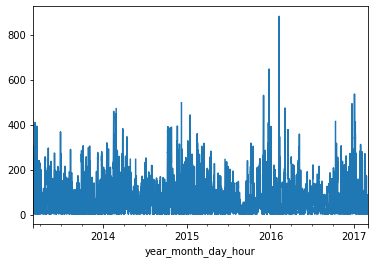

In [10]:
data.plot()

## Data Resample

D	Calendar day, B	Business day, W	Weekly, M	Month, Q	Quarter, A	Year end, H	Hours, T	Minutes, S	Seconds.		


In [11]:
data.resample('D').mean()

year_month_day_hour
2013-03-01      6.375000
2013-03-02     34.041667
2013-03-03     43.833333
2013-03-04     17.541667
2013-03-05    105.375000
                 ...    
2017-02-24     12.666667
2017-02-25     13.125000
2017-02-26     26.583333
2017-02-27     52.333333
2017-02-28     13.125000
Freq: D, Name: PM2.5, Length: 1461, dtype: float64

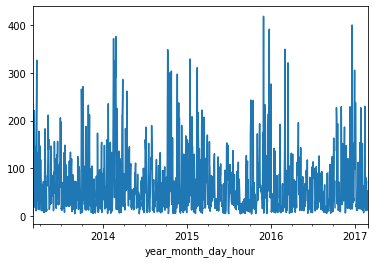

In [12]:
data.resample('D').mean().plot()

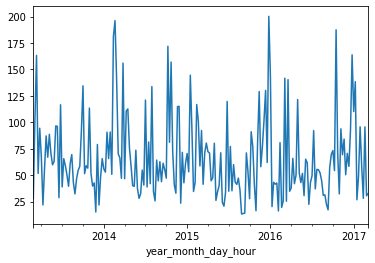

In [13]:
data.resample('W').mean().plot()

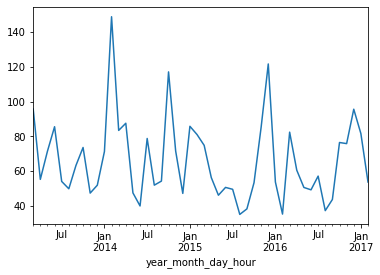

In [14]:
data.resample('M').mean().plot()

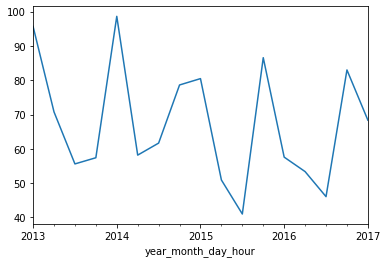

In [15]:
data.resample('Q').mean().plot()

## Differencing

In [16]:
data[:5]

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

In [17]:
data[:5].diff()

year_month_day_hour
2013-03-01 00:00:00    NaN
2013-03-01 01:00:00    3.0
2013-03-01 02:00:00   -2.0
2013-03-01 03:00:00    1.0
2013-03-01 04:00:00   -1.0
Name: PM2.5, dtype: float64

In [18]:
data[:5].diff(2)

year_month_day_hour
2013-03-01 00:00:00    NaN
2013-03-01 01:00:00    NaN
2013-03-01 02:00:00    1.0
2013-03-01 03:00:00   -1.0
2013-03-01 04:00:00    0.0
Name: PM2.5, dtype: float64

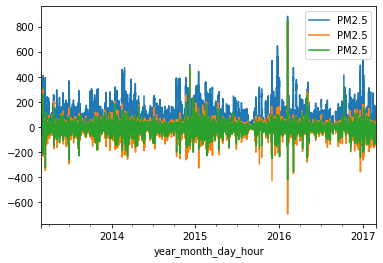

In [19]:
pd.concat([data, data.diff(2), data.diff()],axis=1).plot()

## Shifting

In [20]:
data[:5]

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

In [21]:
data[:5].shift()

year_month_day_hour
2013-03-01 00:00:00    NaN
2013-03-01 01:00:00    4.0
2013-03-01 02:00:00    7.0
2013-03-01 03:00:00    5.0
2013-03-01 04:00:00    6.0
Name: PM2.5, dtype: float64

In [22]:
data[:5].tshift(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


year_month_day_hour
2013-03-01 02:00:00    4.0
2013-03-01 03:00:00    7.0
2013-03-01 04:00:00    5.0
2013-03-01 05:00:00    6.0
2013-03-01 06:00:00    5.0
Name: PM2.5, dtype: float64

## Rolling Window

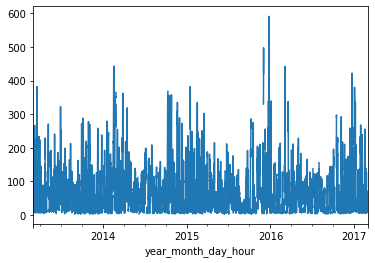

In [23]:
data.rolling(window=10).mean().plot()

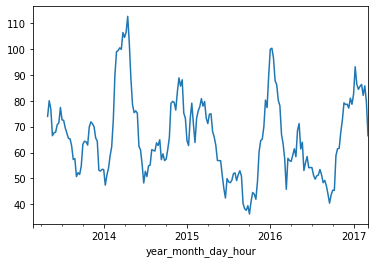

In [24]:
data.resample('W').mean().rolling(window=10).mean().plot()

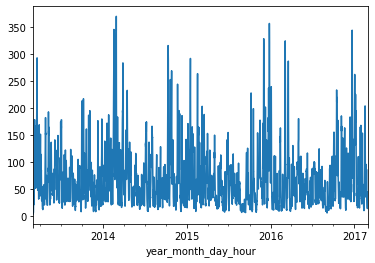

In [25]:
data.ewm(span=50).mean().plot()

## Data Grouping

In [26]:
data.groupby(data.index.dayofweek).mean()

year_month_day_hour
0    61.185189
1    63.648007
2    63.604470
3    65.394399
4    68.185046
5    72.361044
6    67.306629
Name: PM2.5, dtype: float64

In [27]:
data.groupby(data.index.month).mean()

year_month_day_hour
1     73.156108
2     78.147126
3     84.098038
4     64.755974
5     53.704803
6     56.471182
7     59.806038
8     43.490136
9     49.931039
10    80.305925
11    69.901713
12    78.821441
Name: PM2.5, dtype: float64

In [28]:
data.groupby(data.index.year).mean()

year_month_day_hour
2013    64.754924
2014    74.155592
2015    64.610369
2016    59.827554
2017    68.365316
Name: PM2.5, dtype: float64

## Cumulative Sum

In [29]:
data[:5]

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

In [30]:
data[:5].cumsum()

year_month_day_hour
2013-03-01 00:00:00     4.0
2013-03-01 01:00:00    11.0
2013-03-01 02:00:00    16.0
2013-03-01 03:00:00    22.0
2013-03-01 04:00:00    27.0
Name: PM2.5, dtype: float64

## Percentage Change

In [31]:
data[:5]

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

In [32]:
data[:5].pct_change(2)

year_month_day_hour
2013-03-01 00:00:00         NaN
2013-03-01 01:00:00         NaN
2013-03-01 02:00:00    0.250000
2013-03-01 03:00:00   -0.142857
2013-03-01 04:00:00    0.000000
Name: PM2.5, dtype: float64

## Expanding

In [33]:
data[:5].expanding().sum()

year_month_day_hour
2013-03-01 00:00:00     4.0
2013-03-01 01:00:00    11.0
2013-03-01 02:00:00    16.0
2013-03-01 03:00:00    22.0
2013-03-01 04:00:00    27.0
Name: PM2.5, dtype: float64

In [34]:
data[:5].expanding().mean()

year_month_day_hour
2013-03-01 00:00:00    4.000000
2013-03-01 01:00:00    5.500000
2013-03-01 02:00:00    5.333333
2013-03-01 03:00:00    5.500000
2013-03-01 04:00:00    5.400000
Name: PM2.5, dtype: float64